# Climate Enthusiasts


---

## Loading, Cleaning, Summarizing, and Saving Cleaned/Summarized Climate Change Data

In [1]:
# Dependencies and Setup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from pathlib import Path

# File to Load
climate_change_data = Path("Resources/climate_change_data.csv")

# Read the data file and store it into a pandas DataFrame
climate_change_data_df = pd.read_csv(climate_change_data)

In [2]:
# Have a look at the data
climate_change_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.2+ KB


In [3]:
# Changing Date column Dtype from object to datetime
climate_change_data_df['Date'] = pd.to_datetime(climate_change_data_df['Date'])

In [4]:
# Check for missing values
climate_change_data_df.isna().sum()

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

In [7]:
# Extracting Year and Month from the Date column
climate_change_data_df['Year'] = climate_change_data_df['Date'].dt.year
climate_change_data_df['Month'] = climate_change_data_df['Date'].dt.month

In [8]:
# Renaming columns, dropping date column, and reordering them
cleaned_Climate_data_df = climate_change_data_df.rename(columns={
    "CO2 Emissions": "CO2_Emissions",
    "Sea Level Rise": "Sea_Level_Rise",
    "Wind Speed": "Wind_Speed"
}).drop(['Date'], axis=1)[['Year', 'Month', 'Country', 'Location', 'Temperature', 'CO2_Emissions',
                           'Sea_Level_Rise', 'Precipitation', 'Humidity', 'Wind_Speed']]
cleaned_Climate_data_df.head(10)

Year  Month        Country          Location  Temperature  CO2_Emissions  \
0  2000      1         Latvia   New Williamtown    10.688986     403.118903   
1  2000      1   South Africa      North Rachel    13.814430     396.663499   
2  2000      1  French Guiana  West Williamland    27.323718     451.553155   
3  2000      1        Vietnam       South David    12.309581     422.404983   
4  2000      1        Moldova    New Scottburgh    13.210885     410.472999   
5  2000      1   Saint Helena      South Nathan     6.229326     392.473317   
6  2000      1         Tuvalu  Port Richardfurt    21.646738     387.648437   
7  2000      1      Australia          Adambury    19.730800     448.180275   
8  2000      1          Qatar    Williamsonberg    19.858114     379.618820   
9  2000      1           Chad      North Thomas    14.121563     410.517072   

   Sea_Level_Rise  Precipitation   Humidity  Wind_Speed  
0        0.717506      13.835237  23.631256   18.492026  
1        1.205715      40.974084  43.982946   34.249300  
2       -0.160783      42.697931  96.652600   34.124261  
3       -0.475931       5.193341  47.467938    8.554563  
4        1.135757      78.695280  61.789672    8.001164  
5        1.122210      76.368331  48.973886   30.398908  
6        0.058471       9.650389  11.402284   15.720944  
7        0.001415      93.360755  21.526350   29.993495  
8        0.584881       6.218846  30.861949   37.519472  
9       -1.712224      15.351583  88.422794   47.922521

In [9]:
# Count of Countries and Locations
country_counts = cleaned_Climate_data_df['Country'].value_counts()
location_counts = cleaned_Climate_data_df['Location'].value_counts()
print(country_counts)
print(location_counts)

Congo                        94
Korea                        76
Tanzania                     61
Armenia                      58
French Guiana                58
                             ..
Saint Pierre and Miquelon    28
Chile                        28
Dominican Republic           28
Syrian Arab Republic         27
Saint Kitts and Nevis        23
Name: Country, Length: 243, dtype: int64
North David          12
Lake James           11
New James            10
West John            10
Lake Michael         10
                     ..
South Corey           1
Madisonborough        1
Lake Matthewberg      1
North Williamton      1
West Anthonyburgh     1
Name: Location, Length: 7764, dtype: int64


In [10]:
# Summary statistics of the data
climate_change_summary_df = cleaned_Climate_data_df.describe()
climate_change_summary_df.head(10)

Year         Month   Temperature  CO2_Emissions  \
count  10000.000000  10000.000000  10000.000000   10000.000000   
mean    2010.997900      6.523100     14.936034     400.220469   
std        6.633634      3.448718      5.030616      49.696933   
min     2000.000000      1.000000     -3.803589     182.131220   
25%     2005.000000      4.000000     11.577991     367.109330   
50%     2011.000000      7.000000     14.981136     400.821324   
75%     2017.000000     10.000000     18.305826     433.307905   
max     2022.000000     12.000000     33.976956     582.899701   

       Sea_Level_Rise  Precipitation      Humidity    Wind_Speed  
count    10000.000000   10000.000000  10000.000000  10000.000000  
mean        -0.003152      49.881208     49.771302     25.082066  
std          0.991349      28.862417     28.929320     14.466648  
min         -4.092155       0.010143      0.018998      0.001732  
25%         -0.673809      24.497516     24.713250     12.539733  
50%          0.002332      49.818967     49.678412     24.910787  
75%          0.675723      74.524991     75.206390     37.670260  
max          4.116559      99.991900     99.959665     49.997664

In [11]:
numeric_columns = ['Temperature', 'CO2_Emissions', 'Sea_Level_Rise', 'Precipitation', 'Humidity', 'Wind_Speed']
Climate_data_avg = cleaned_Climate_data_df[numeric_columns].mean().to_frame(name='Average').T
Climate_data_avg

Temperature  CO2_Emissions  Sea_Level_Rise  Precipitation   Humidity  \
Average    14.936034     400.220469       -0.003152      49.881208  49.771302   

         Wind_Speed  
Average   25.082066

In [12]:
# Grouping by Year and Country to calculate min, max, and mean values
Yearly_country_temp = cleaned_Climate_data_df.groupby(['Year', 'Country'])['Temperature'].agg(['min', 'max', 'mean']).round(2)
Yearly_country_CO2_Emissions = cleaned_Climate_data_df.groupby(['Year', 'Country'])['CO2_Emissions'].agg(['min', 'max', 'mean']).round(2)
Yearly_country_Sea_Level_Rise = cleaned_Climate_data_df.groupby(['Year', 'Country'])['Sea_Level_Rise'].agg(['min', 'max', 'mean']).round(2)
Yearly_country_Precipitation = cleaned_Climate_data_df.groupby(['Year', 'Country'])['Precipitation'].agg(['min', 'max', 'mean']).round(2)
Yearly_country_Humidity = cleaned_Climate_data_df.groupby(['Year', 'Country'])['Humidity'].agg(['min', 'max', 'mean']).round(2)
Yearly_country_Wind_Speed = cleaned_Climate_data_df.groupby(['Year', 'Country'])['Wind_Speed'].agg(['min', 'max', 'mean']).round(2)

In [13]:
# Grouping by Country to calculate min, max, and mean values
country_temp = cleaned_Climate_data_df.groupby('Country')['Temperature'].agg(['min', 'max', 'mean']).round(2)
country_CO2_Emissions = cleaned_Climate_data_df.groupby('Country')['CO2_Emissions'].agg(['min', 'max', 'mean']).round(3)
country_Sea_Level_Rise = cleaned_Climate_data_df.groupby('Country')['Sea_Level_Rise'].agg(['min', 'max', 'mean']).round(2)
country_Precipitation = cleaned_Climate_data_df.groupby('Country')['Precipitation'].agg(['min', 'max', 'mean']).round(2)
country_Humidity = cleaned_Climate_data_df.groupby('Country')['Humidity'].agg(['min', 'max', 'mean']).round(2)
country_Wind_Speed = cleaned_Climate_data_df.groupby('Country')['Wind_Speed'].agg(['min', 'max', 'mean']).round(2)

In [14]:
# Save the cleaned and summarized data to a new CSV file
cleaned_Climate_data_df.to_csv("Resources/cleaned_climate_data.csv", index=False)
climate_change_summary_df.to_csv("Resources/climate_data_summary.csv")

## Visualization of Climate Change Data

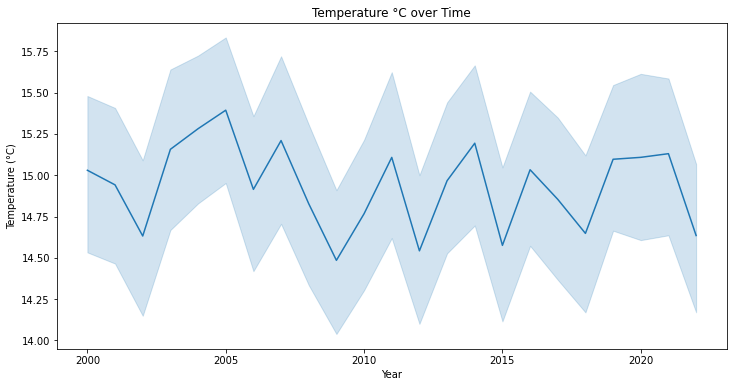

In [15]:
# Visualization: Line Plot of temperature over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Temperature', data=cleaned_Climate_data_df)
plt.title('Temperature °C over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.savefig("Images/temperature_lineplot.png")
plt.show()

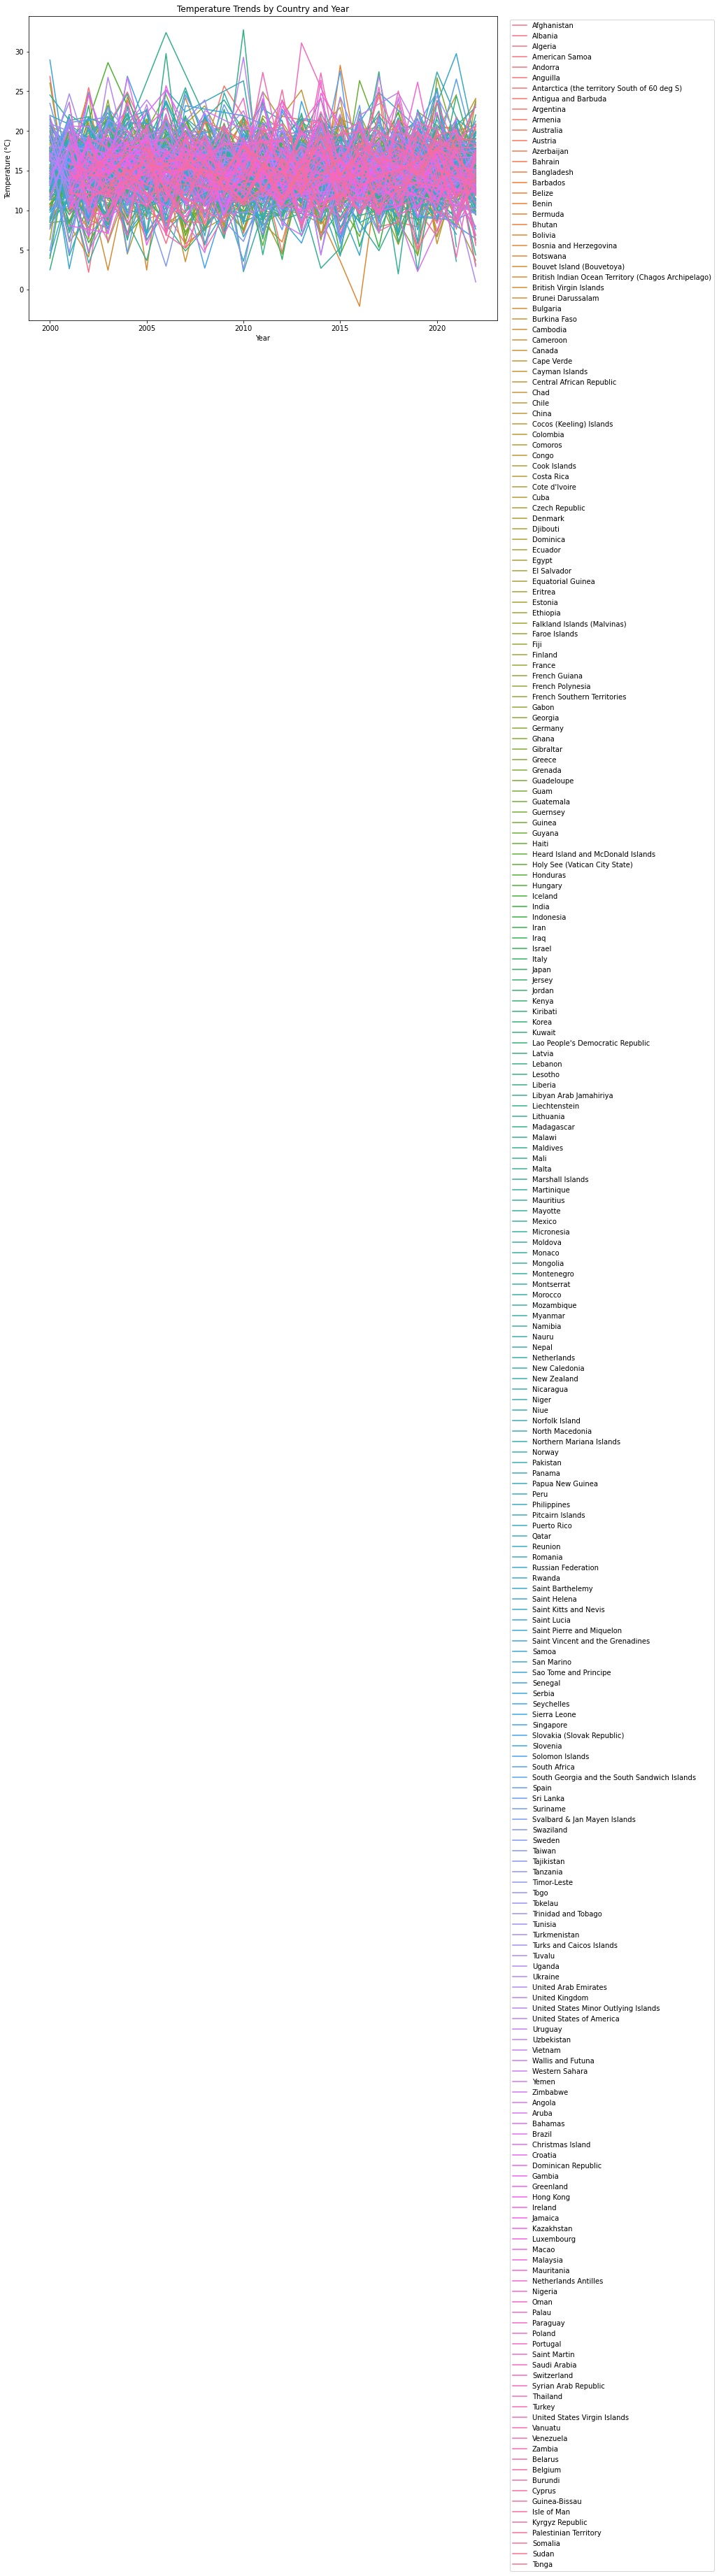

In [14]:
# Visualizing temperature trends by country and year
plt.figure(figsize=(12, 8))
sns.lineplot(data=Yearly_country_temp, x='Year', y='mean', hue='Country')
plt.title('Temperature Trends by Country and Year')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.savefig("Images/temperature_trends_by_country_year.png")
plt.show()

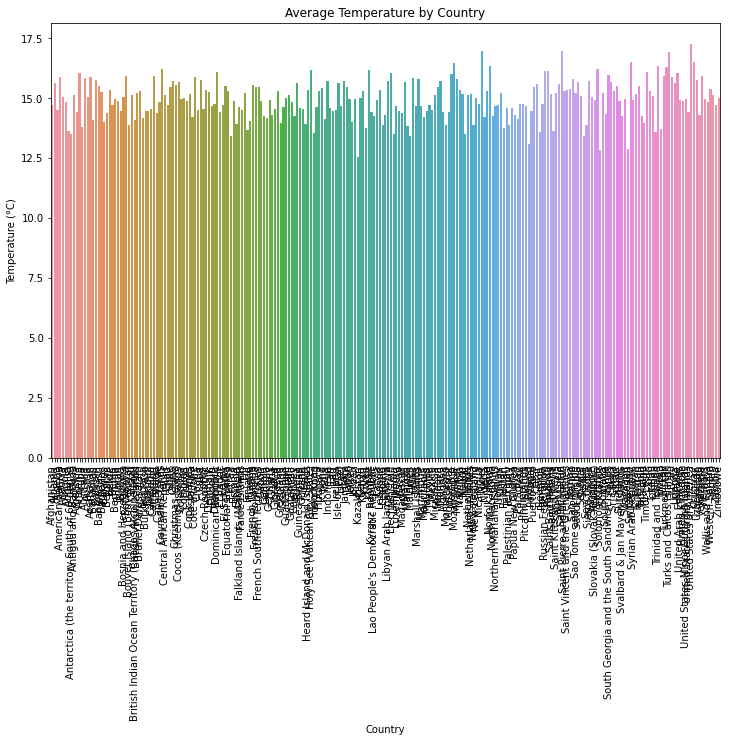

In [15]:
# Visualizing temperature statistics by country
plt.figure(figsize=(12, 8))
sns.barplot(x=country_temp.index, y='mean', data=country_temp)
plt.title('Average Temperature by Country')
plt.xlabel('Country')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=90)
plt.savefig("Images/average_temperature_by_country.png")
plt.show()

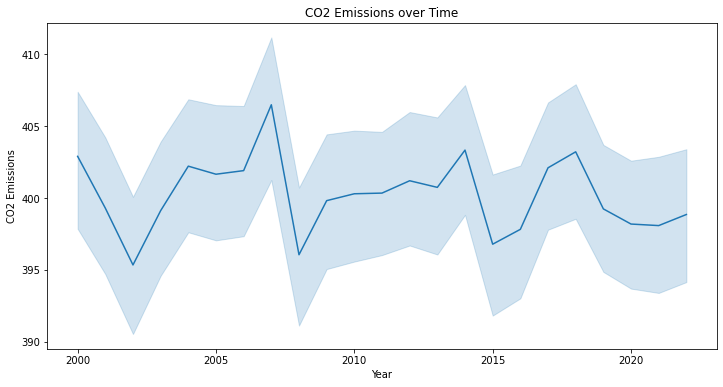

In [16]:
# Visualization: Line Plot of CO2 Emissions over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='CO2_Emissions', data=cleaned_Climate_data_df)
plt.title('CO2 Emissions over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.savefig("Images/co2_emissions_lineplot.png")
plt.show()

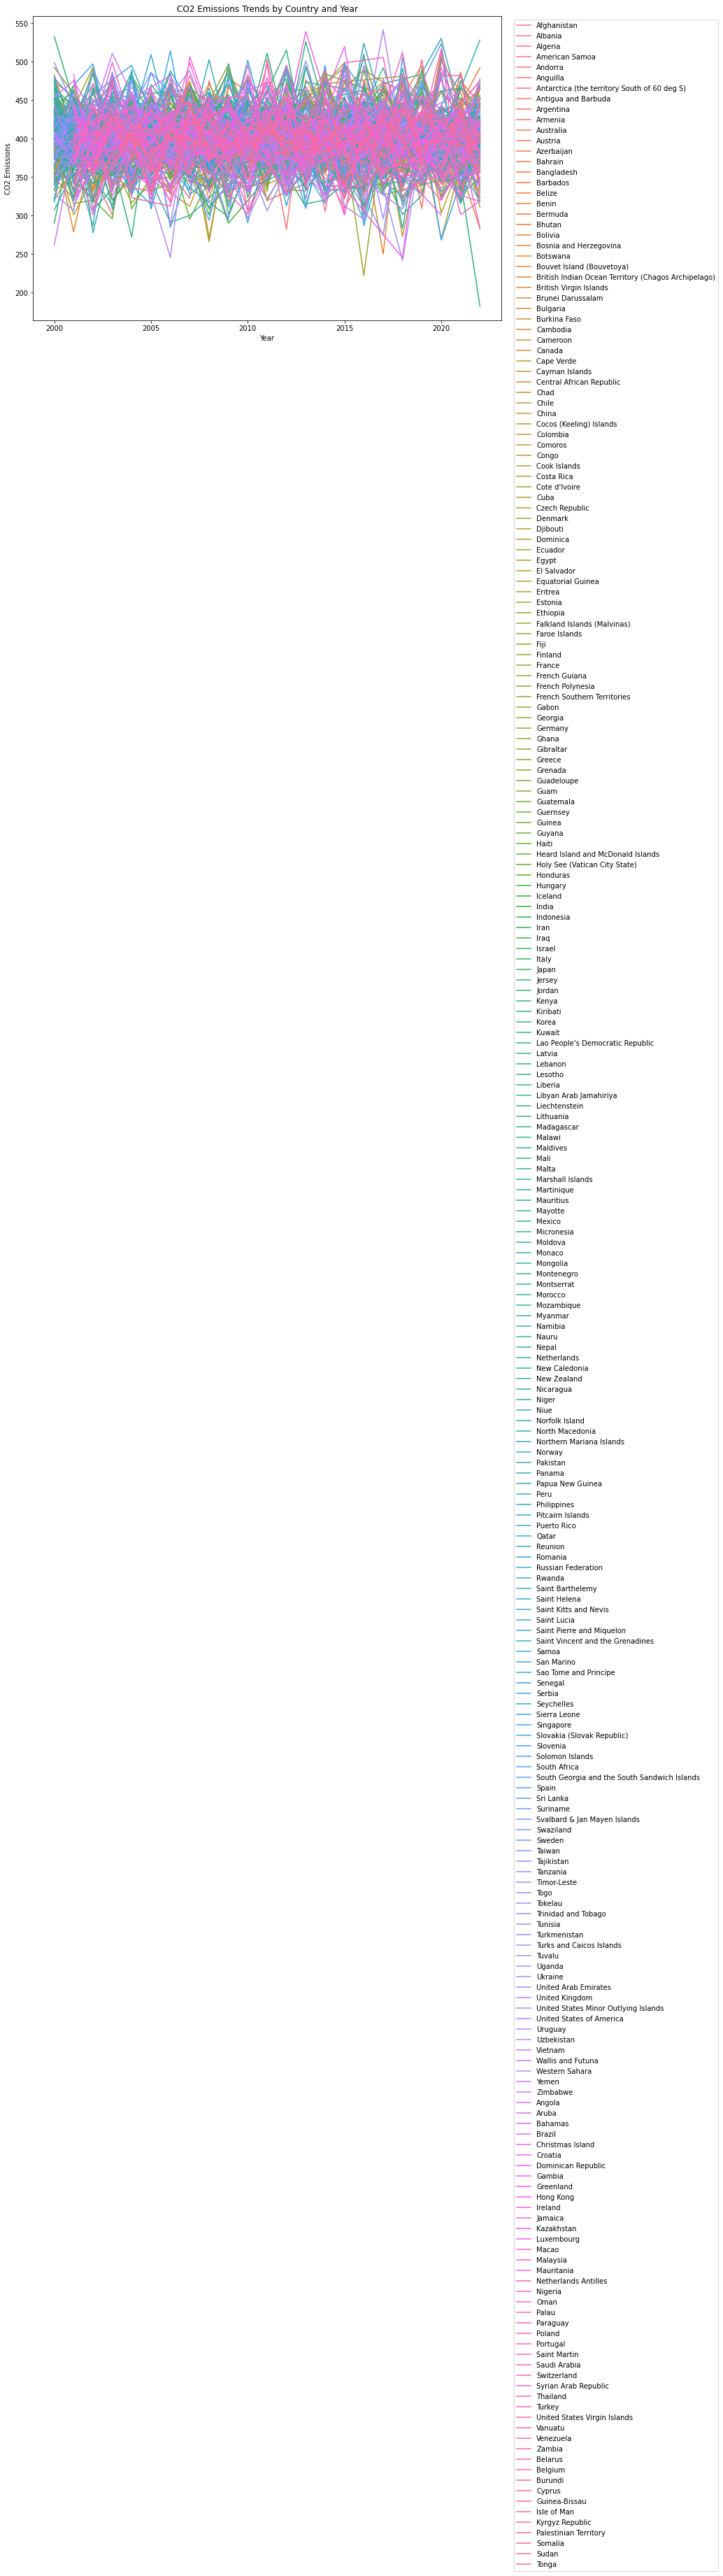

In [17]:
# Visualizing CO2 emissions trends by country and year
plt.figure(figsize=(12, 8))
sns.lineplot(data=Yearly_country_CO2_Emissions, x='Year', y='mean', hue='Country')
plt.title('CO2 Emissions Trends by Country and Year')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.savefig("Images/co2_emissions_trends_by_country_year.png")
plt.show()

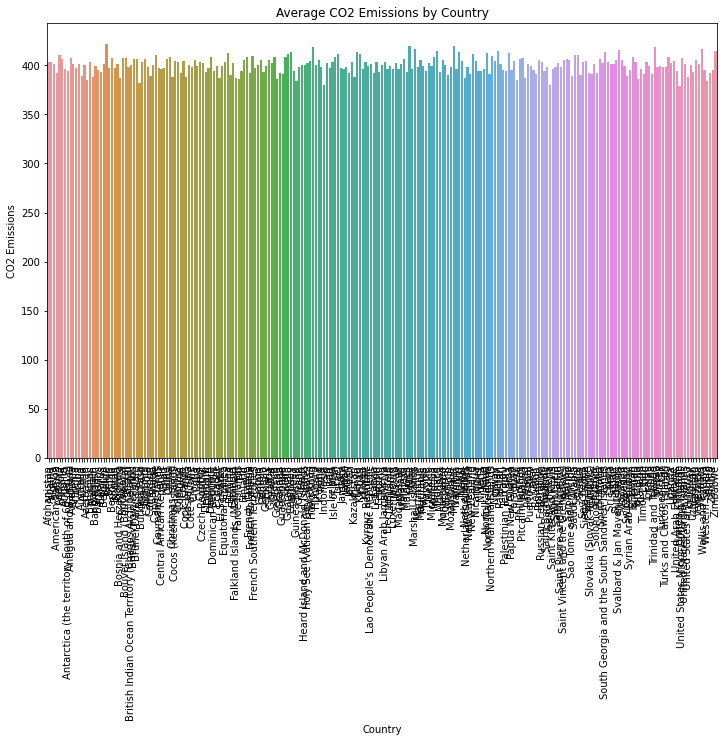

In [18]:
# Visualizing CO2 emissions statistics by country
plt.figure(figsize=(12, 8))
sns.barplot(x=country_CO2_Emissions.index, y='mean', data=country_CO2_Emissions)
plt.title('Average CO2 Emissions by Country')
plt.xlabel('Country')
plt.ylabel('CO2 Emissions')
plt.xticks(rotation=90)
plt.savefig("Images/average_co2_emissions_by_country.png")
plt.show()

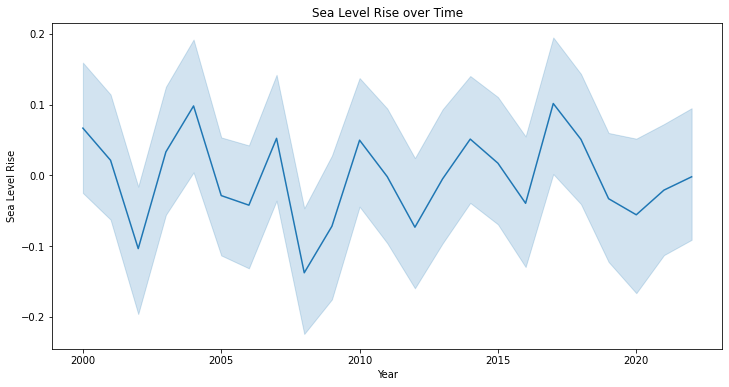

In [19]:
# Visualization: Line Plot of sea level rise over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Sea_Level_Rise', data=cleaned_Climate_data_df)
plt.title('Sea Level Rise over Time')
plt.xlabel('Year')
plt.ylabel('Sea Level Rise')
plt.savefig("Images/sea_level_rise_lineplot.png")
plt.show()

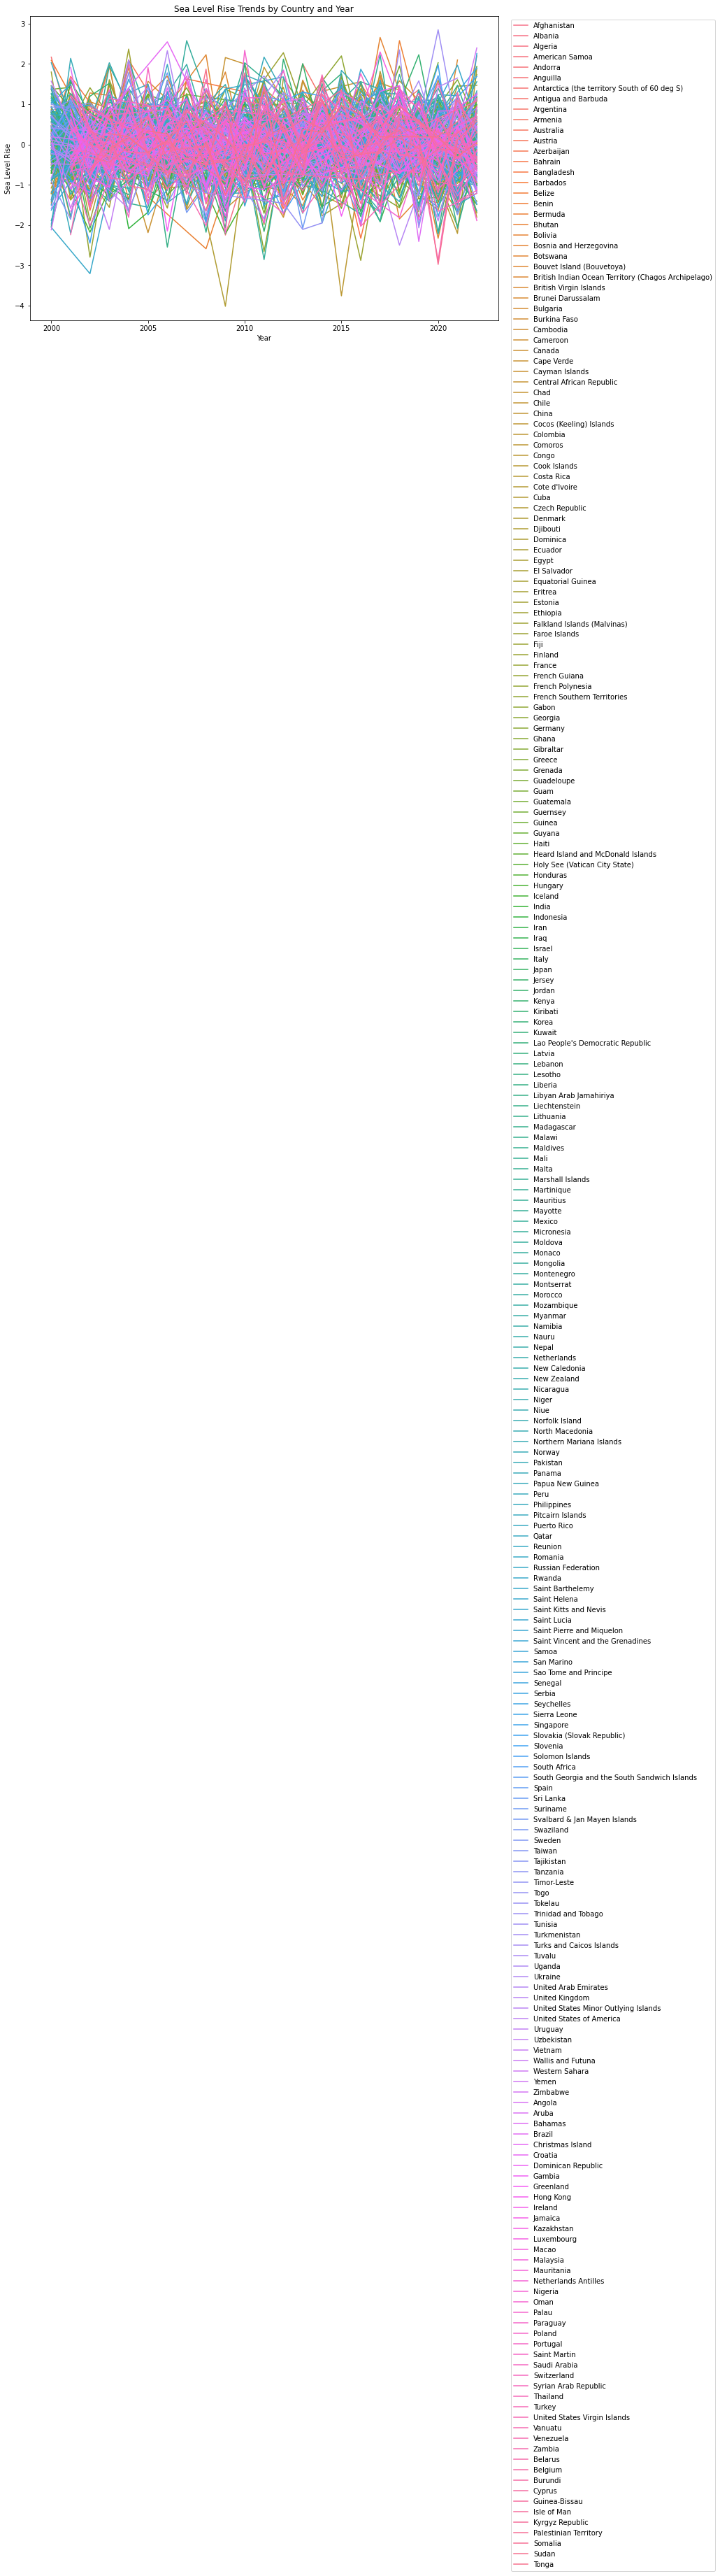

In [20]:
# Visualizing sea level rise trends by country and year
plt.figure(figsize=(12, 8))
sns.lineplot(data=Yearly_country_Sea_Level_Rise, x='Year', y='mean', hue='Country')
plt.title('Sea Level Rise Trends by Country and Year')
plt.xlabel('Year')
plt.ylabel('Sea Level Rise')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.savefig("Images/sea_level_rise_trends_by_country_year.png")
plt.show()

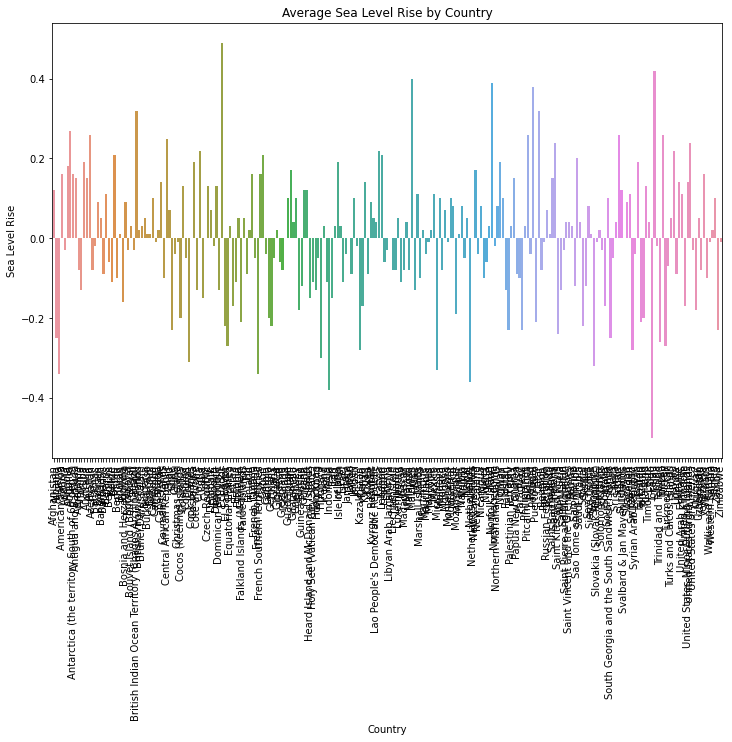

In [21]:
# Visualizing sea level rise statistics by country
plt.figure(figsize=(12, 8))
sns.barplot(x=country_Sea_Level_Rise.index, y='mean', data=country_Sea_Level_Rise)
plt.title('Average Sea Level Rise by Country')
plt.xlabel('Country')
plt.ylabel('Sea Level Rise')
plt.xticks(rotation=90)
plt.savefig("Images/average_sea_level_rise_by_country.png")
plt.show()

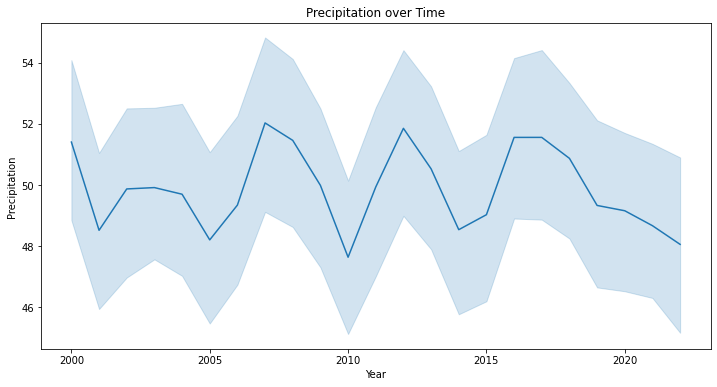

In [22]:
# Visualization: Line Plot of precipitation over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Precipitation', data=cleaned_Climate_data_df)
plt.title('Precipitation over Time')
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.savefig("Images/precipitation_lineplot.png")
plt.show()

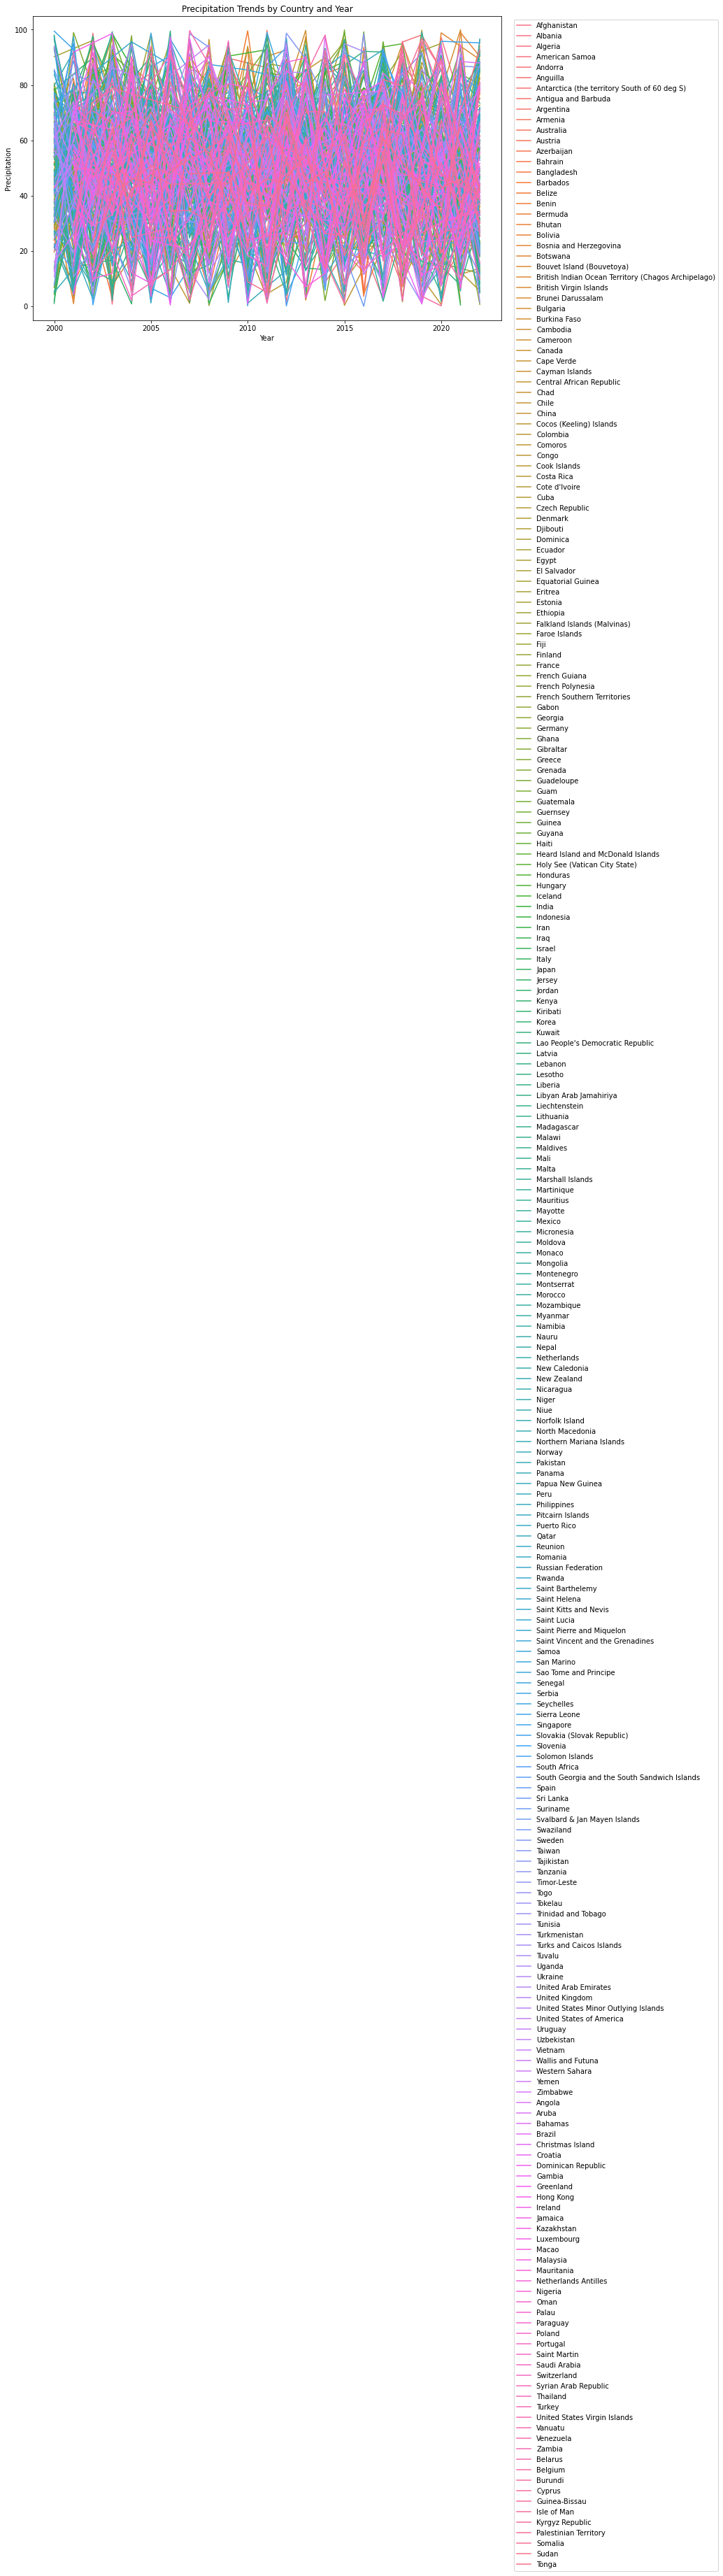

In [23]:
# Visualizing precipitation trends by country and year
plt.figure(figsize=(12, 8))
sns.lineplot(data=Yearly_country_Precipitation, x='Year', y='mean', hue='Country')
plt.title('Precipitation Trends by Country and Year')
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.savefig("Images/precipitation_trends_by_country_year.png")
plt.show()

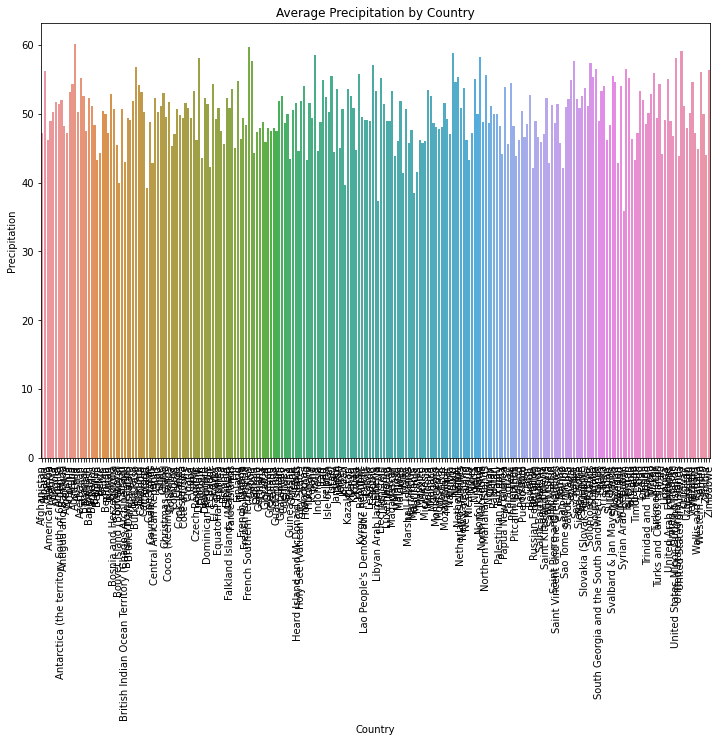

In [24]:
# Visualizing precipitation statistics by country
plt.figure(figsize=(12, 8))
sns.barplot(x=country_Precipitation.index, y='mean', data=country_Precipitation)
plt.title('Average Precipitation by Country')
plt.xlabel('Country')
plt.ylabel('Precipitation')
plt.xticks(rotation=90)
plt.savefig("Images/average_precipitation_by_country.png")
plt.show()

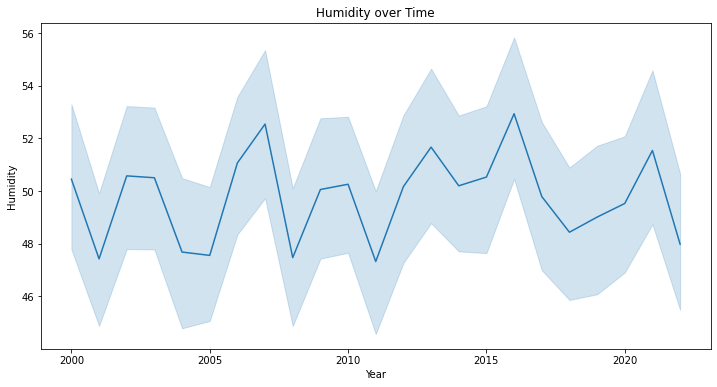

In [25]:
# Visualization: Line Plot of humidity over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Humidity', data=cleaned_Climate_data_df)
plt.title('Humidity over Time')
plt.xlabel('Year')
plt.ylabel('Humidity')
plt.savefig("Images/humidity_lineplot.png")
plt.show()

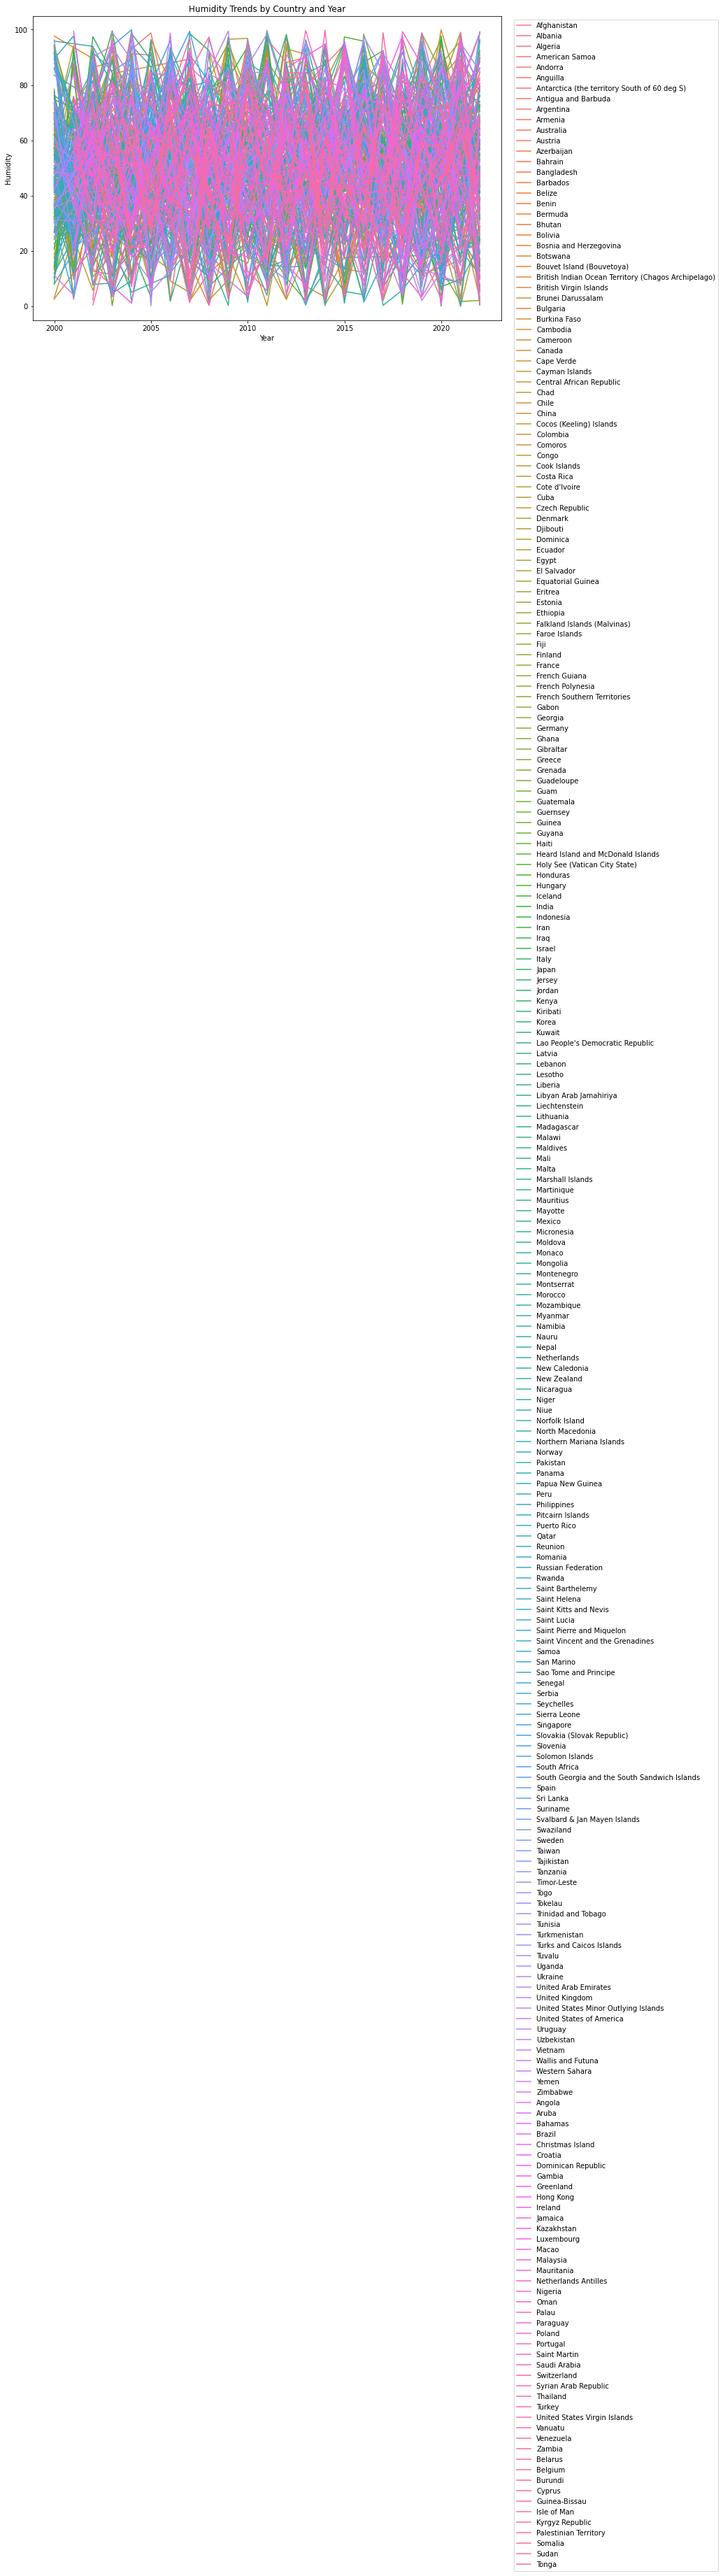

In [18]:
# Visualizing humidity trends by country and year
plt.figure(figsize=(12, 8))
sns.lineplot(data=Yearly_country_Humidity, x='Year', y='mean', hue='Country')
plt.title('Humidity Trends by Country and Year')
plt.xlabel('Year')
plt.ylabel('Humidity')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.savefig("Images/humidity_trends_by_country_year.png")
plt.show()

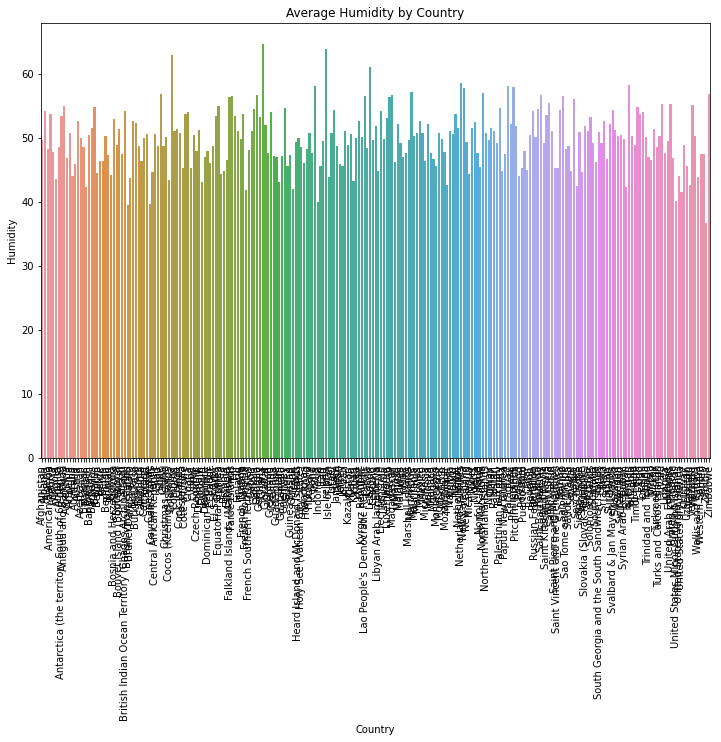

In [27]:
# Visualizing humidity statistics by country
plt.figure(figsize=(12, 8))
sns.barplot(x=country_Humidity.index, y='mean', data=country_Humidity)
plt.title('Average Humidity by Country')
plt.xlabel('Country')
plt.ylabel('Humidity')
plt.xticks(rotation=90)
plt.savefig("Images/average_humidity_by_country.png")
plt.show()

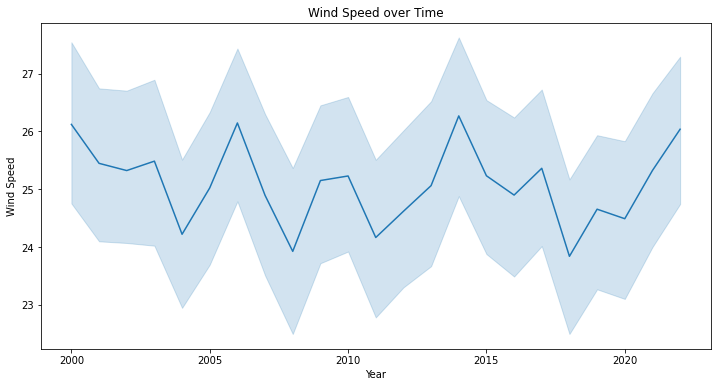

In [28]:
# Visualization: Line Plot of wind speed over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Wind_Speed', data=cleaned_Climate_data_df)
plt.title('Wind Speed over Time')
plt.xlabel('Year')
plt.ylabel('Wind Speed')
plt.savefig("Images/wind_speed_lineplot.png")
plt.show()

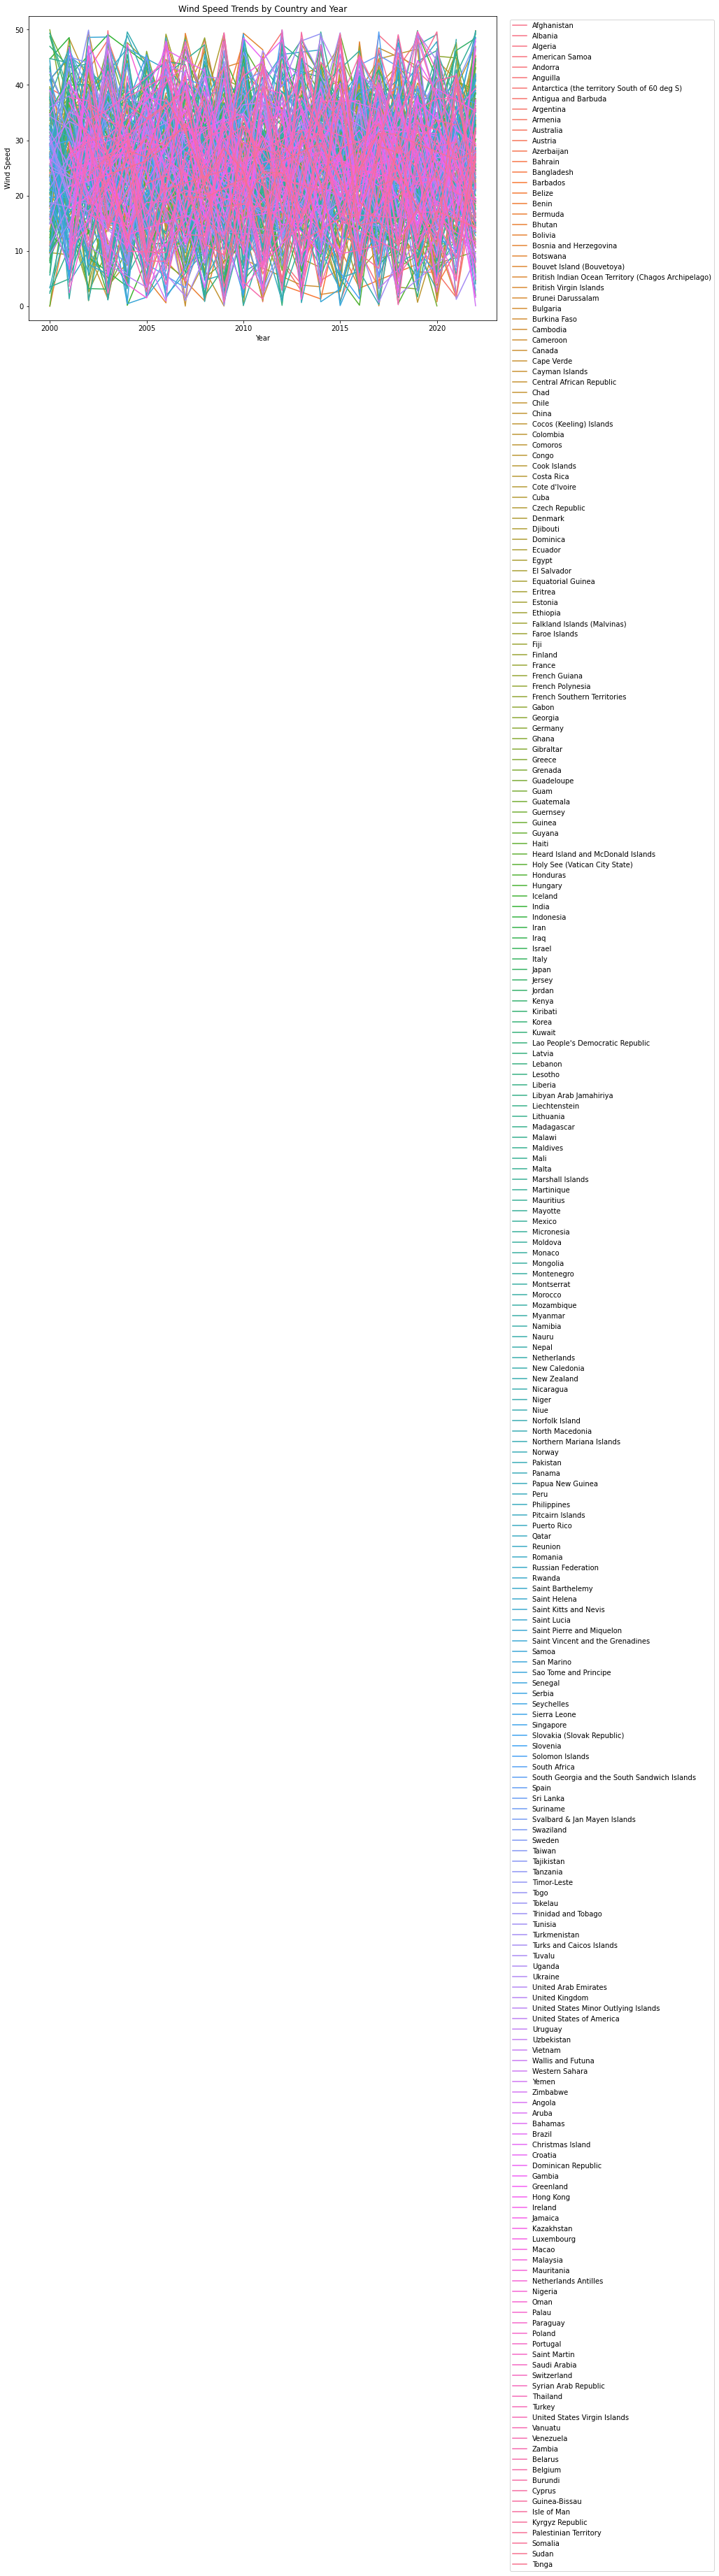

In [29]:
# Visualizing wind speed trends by country and year
plt.figure(figsize=(12, 8))
sns.lineplot(data=Yearly_country_Wind_Speed, x='Year', y='mean', hue='Country')
plt.title('Wind Speed Trends by Country and Year')
plt.xlabel('Year')
plt.ylabel('Wind Speed')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.savefig("Images/wind_speed_trends_by_country_year.png")
plt.show()

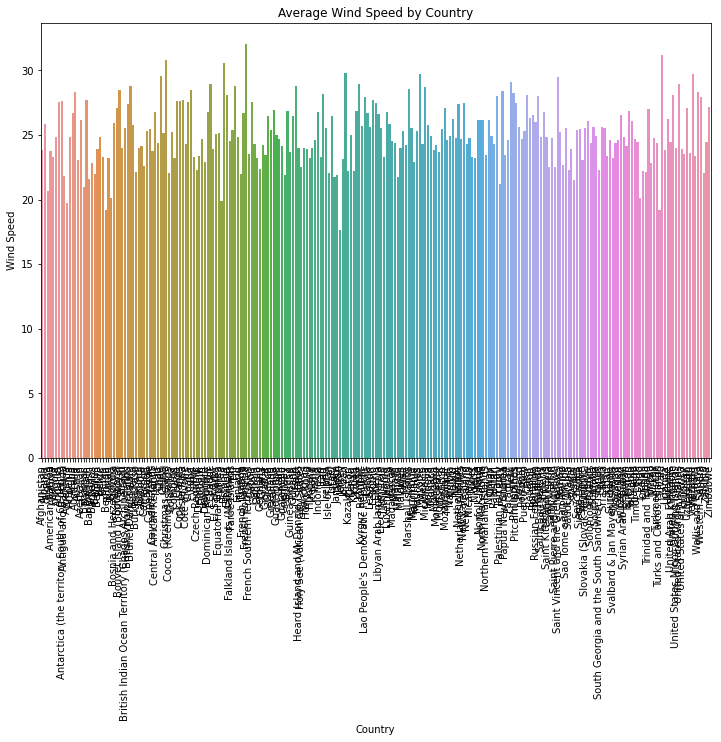

In [30]:
# Visualizing wind speed statistics by country
plt.figure(figsize=(12, 8))
sns.barplot(x=country_Wind_Speed.index, y='mean', data=country_Wind_Speed)
plt.title('Average Wind Speed by Country')
plt.xlabel('Country')
plt.ylabel('Wind Speed')
plt.xticks(rotation=90)
plt.savefig("Images/average_wind_speed_by_country.png")
plt.show()

## Additional Plots

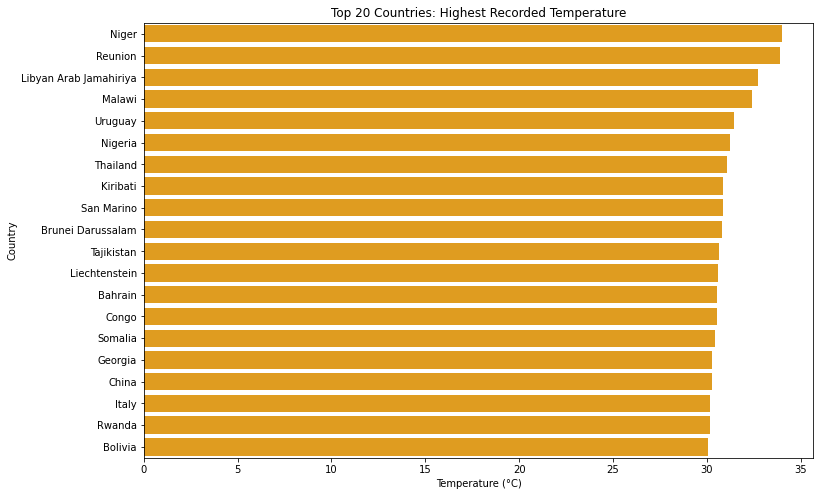

In [31]:
# Top 20 countries for highest recorded temperature
top_20_highest_temp = country_temp.nlargest(20, 'max')
plt.figure(figsize=(12, 8))
sns.barplot(x='max', y=top_20_highest_temp.index, data=top_20_highest_temp, color='orange')
plt.title('Top 20 Countries: Highest Recorded Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Country')
plt.savefig("Images/top_20_highest_temperature.png")
plt.show()

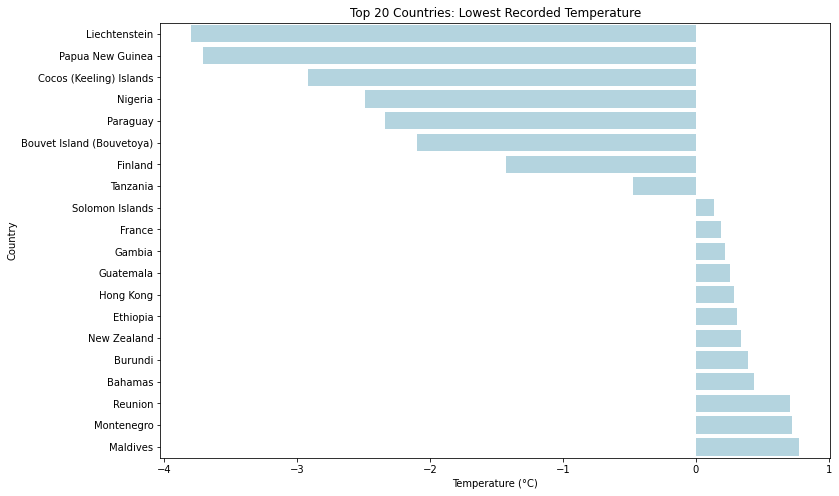

In [32]:
# Top 20 countries for lowest recorded temperature
top_20_lowest_temp = country_temp.nsmallest(20, 'min')
plt.figure(figsize=(12, 8))
sns.barplot(x='min', y=top_20_lowest_temp.index, data=top_20_lowest_temp, color='lightblue')
plt.title('Top 20 Countries: Lowest Recorded Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Country')
plt.savefig("Images/top_20_lowest_temperature.png")
plt.show()

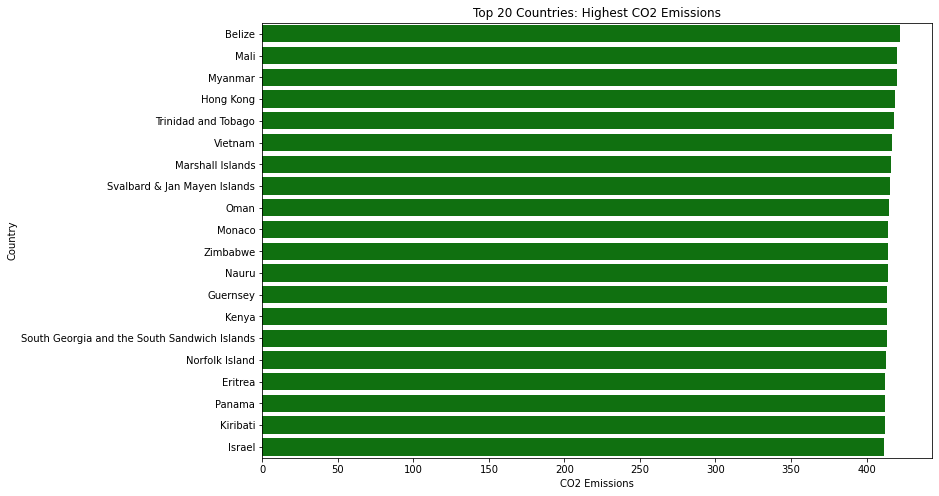

In [17]:
# Top 20 countries with highest CO2 emissions
top_20_highest_co2 = country_CO2_Emissions.nlargest(20, 'mean')
plt.figure(figsize=(12, 8))
sns.barplot(x='mean', y=top_20_highest_co2.index, data=top_20_highest_co2, color='green')
plt.title('Top 20 Countries: Highest CO2 Emissions')
plt.xlabel('CO2 Emissions')
plt.ylabel('Country')
plt.savefig("Images/top_20_highest_co2_emissions.png")
plt.show()

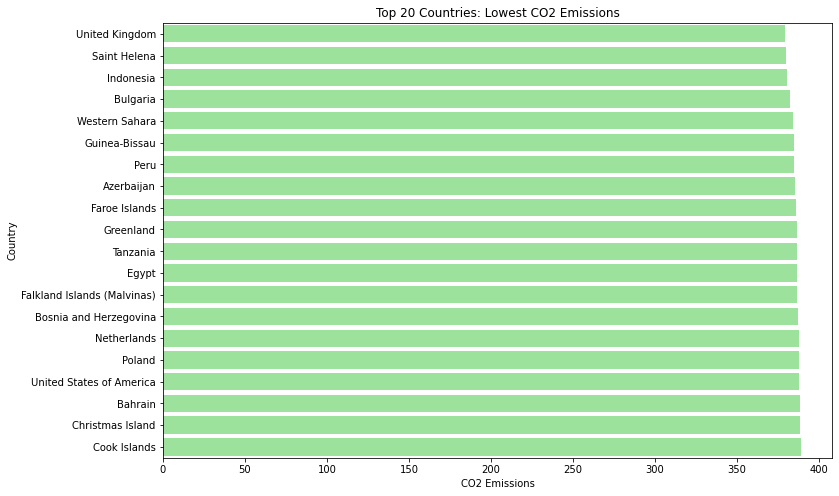

In [34]:
# Top 20 countries with lowest CO2 emissions
top_20_lowest_co2 = country_CO2_Emissions.nsmallest(20, 'mean')
plt.figure(figsize=(12, 8))
sns.barplot(x='mean', y=top_20_lowest_co2.index, data=top_20_lowest_co2, color='lightgreen')
plt.title('Top 20 Countries: Lowest CO2 Emissions')
plt.xlabel('CO2 Emissions')
plt.ylabel('Country')
plt.savefig("Images/top_20_lowest_co2_emissions.png")
plt.show()

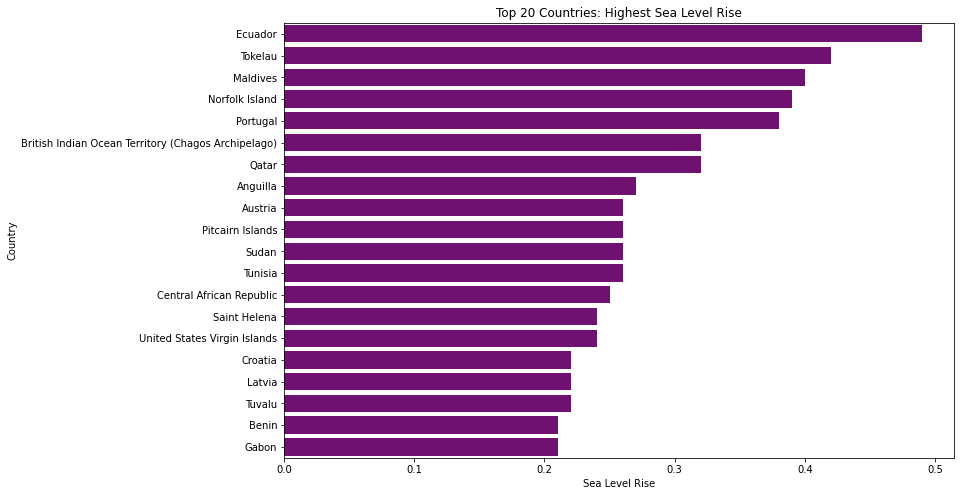

In [35]:
# Top 20 countries with highest sea level rise
top_20_highest_sea_level = country_Sea_Level_Rise.nlargest(20, 'mean')
plt.figure(figsize=(12, 8))
sns.barplot(x='mean', y=top_20_highest_sea_level.index, data=top_20_highest_sea_level, color='purple')
plt.title('Top 20 Countries: Highest Sea Level Rise')
plt.xlabel('Sea Level Rise')
plt.ylabel('Country')
plt.savefig("Images/top_20_highest_sea_level_rise.png")
plt.show()

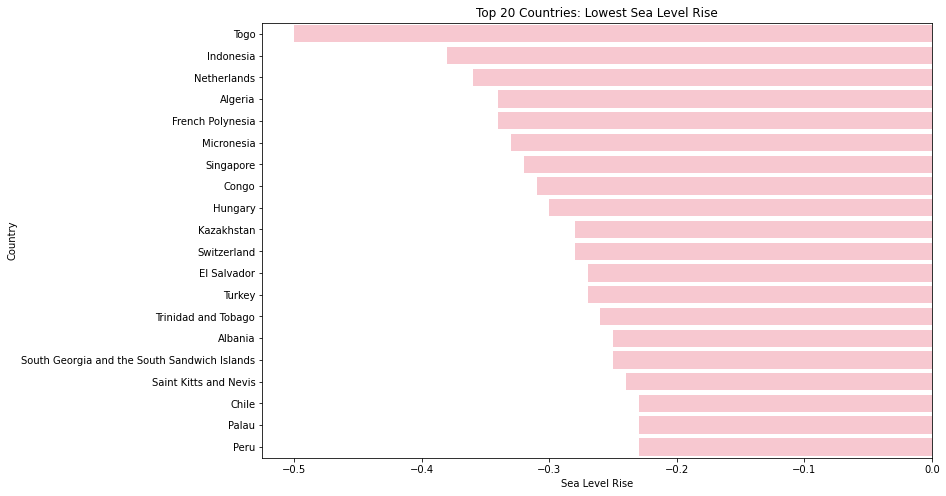

In [36]:
# Top 20 countries with lowest sea level rise
top_20_lowest_sea_level = country_Sea_Level_Rise.nsmallest(20, 'mean')
plt.figure(figsize=(12, 8))
sns.barplot(x='mean', y=top_20_lowest_sea_level.index, data=top_20_lowest_sea_level, color='pink')
plt.title('Top 20 Countries: Lowest Sea Level Rise')
plt.xlabel('Sea Level Rise')
plt.ylabel('Country')
plt.savefig("Images/top_20_lowest_sea_level_rise.png")
plt.show()

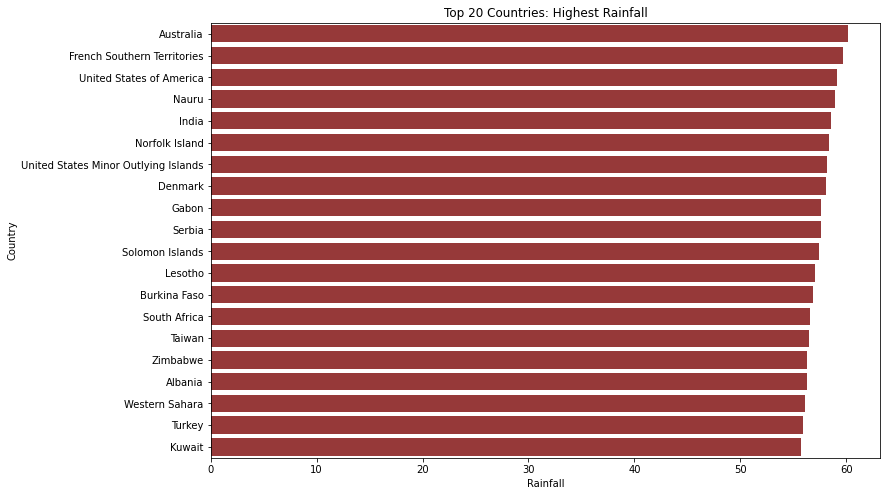

In [37]:
# Top 20 countries with highest rainfall
top_20_highest_rainfall = country_Precipitation.nlargest(20, 'mean')
plt.figure(figsize=(12, 8))
sns.barplot(x='mean', y=top_20_highest_rainfall.index, data=top_20_highest_rainfall, color='brown')
plt.title('Top 20 Countries: Highest Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Country')
plt.savefig("Images/top_20_highest_rainfall.png")
plt.show()

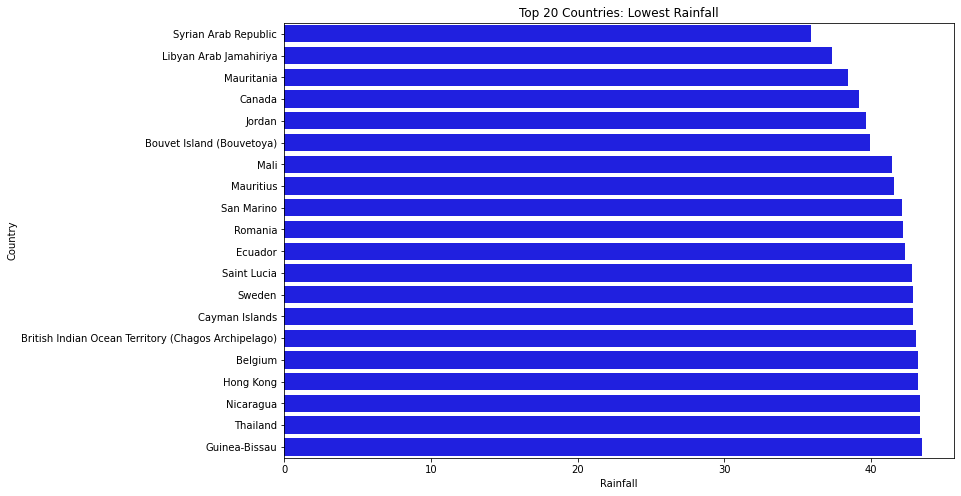

In [38]:
# Top 20 countries with lowest rainfall
top_20_lowest_rainfall = country_Precipitation.nsmallest(20, 'mean')
plt.figure(figsize=(12, 8))
sns.barplot(x='mean', y=top_20_lowest_rainfall.index, data=top_20_lowest_rainfall, color='blue')
plt.title('Top 20 Countries: Lowest Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Country')
plt.savefig("Images/top_20_lowest_rainfall.png")
plt.show()

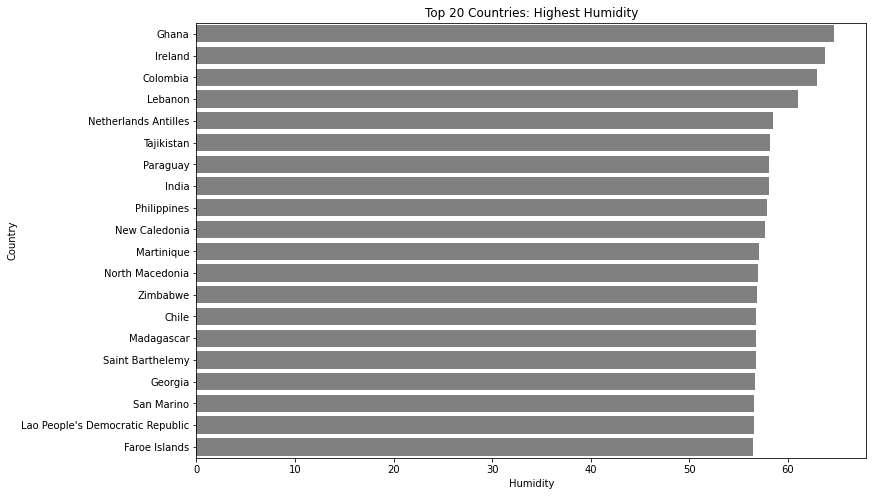

In [39]:
# Top 20 countries with highest humidity
top_20_highest_humidity = country_Humidity.nlargest(20, 'mean')
plt.figure(figsize=(12, 8))
sns.barplot(x='mean', y=top_20_highest_humidity.index, data=top_20_highest_humidity, color='gray')
plt.title('Top 20 Countries: Highest Humidity')
plt.xlabel('Humidity')
plt.ylabel('Country')
plt.savefig("Images/top_20_highest_humidity.png")
plt.show()

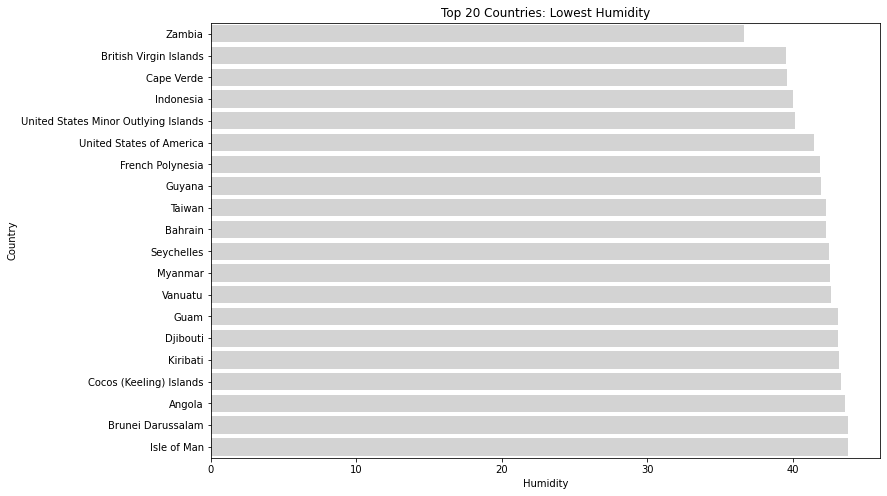

In [40]:
# Top 20 countries with lowest humidity
top_20_lowest_humidity = country_Humidity.nsmallest(20, 'mean')
plt.figure(figsize=(12, 8))
sns.barplot(x='mean', y=top_20_lowest_humidity.index, data=top_20_lowest_humidity, color='lightgray')
plt.title('Top 20 Countries: Lowest Humidity')
plt.xlabel('Humidity')
plt.ylabel('Country')
plt.savefig("Images/top_20_lowest_humidity.png")
plt.show()

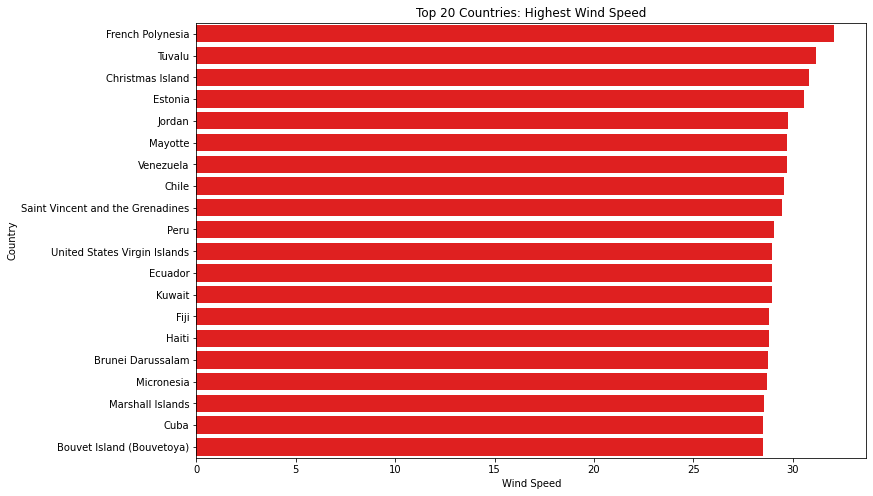

In [41]:
# Top 20 countries with highest wind speed
top_20_highest_wind_speed = country_Wind_Speed.nlargest(20, 'mean')
plt.figure(figsize=(12, 8))
sns.barplot(x='mean', y=top_20_highest_wind_speed.index, data=top_20_highest_wind_speed, color='red')
plt.title('Top 20 Countries: Highest Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Country')
plt.savefig("Images/top_20_highest_wind_speed.png")
plt.show()

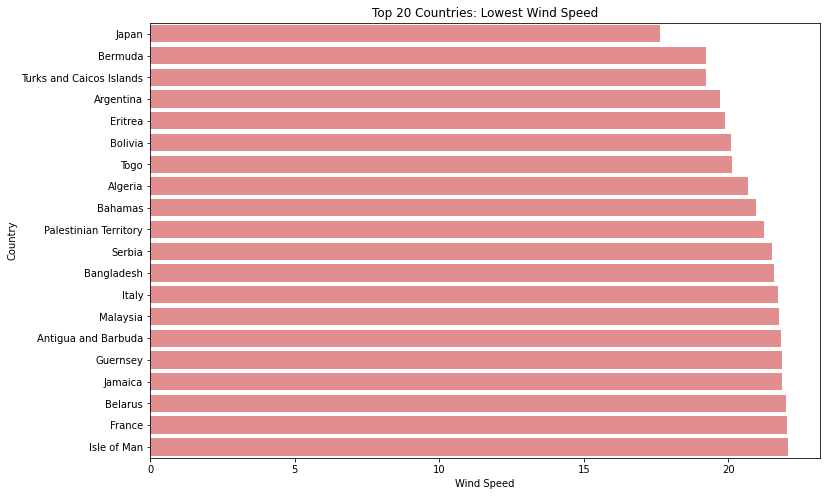

In [16]:
# Top 20 countries with lowest wind speed
top_20_lowest_wind_speed = country_Wind_Speed.nsmallest(20, 'mean')
plt.figure(figsize=(12, 8))
sns.barplot(x='mean', y=top_20_lowest_wind_speed.index, data=top_20_lowest_wind_speed, color='lightcoral')
plt.title('Top 20 Countries: Lowest Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Country')
plt.savefig("Images/top_20_lowest_wind_speed.png")
plt.show()

## Loading, Cleaning, Summarizing, and Saving Cleaned/Summarized Natural Disaster Data
